In [737]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely

import seaborn as sns
import matplotlib.pyplot as plt

In [738]:
df01 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 1월.xlsx')
df02 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 2월.xlsx')
df03 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 3월.xlsx')
df04 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 4월.xlsx')
df05 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 5월.xlsx')
df06 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 6월.xlsx')
df07 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 7월.xlsx')
df08 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 8월.xlsx')
df09 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 9월.xlsx')
df10 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 10월.xlsx')
df11 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 11월.xlsx')
df12 = pd.read_excel('../데이터/수요예측/전처리_수요/환경공단충전소/2021년 12월.xlsx')

df01.head()

,충전소명,충전기 ID,충전기 타입,충전 시작 시각,충전 종료 시각,충전기 용량,충전량,지역 주소,운영기관,이용 가능 시간(휴점일),이용자 제한
0,난향동 주민센터,1,DC차데모+AC3상+DC콤보,20210101094231,20210101095925,급속(50kW),5.74,서울특별시 관악구 난곡로 67,환경부,24시간 이용가능,없음
1,목2동 주민센터,1,DC차데모+AC3상+DC콤보,20210101092212,20210101100258,급속(100kW멀티),17.48,서울특별시 양천구 목동 중앙본로 120,환경부,24시간 이용가능,없음
2,양화진 공영주차장,21,DC콤보,20210101110902,20210101112017,급속(200kW동시),1.04,서울특별시 마포구 토정로 2,환경부,24시간 이용가능,없음
3,은평구민체육센터,1,DC차데모+AC3상+DC콤보,20210101104218,20210101112304,급속(50kW),18.39,서울특별시 은평구 진관1로 40 입구 앞,환경부,24시간 이용가능,없음
4,롯데마트 중계점 야외주차장,44,DC콤보,20210101123856,20210101131856,급속(100kW단독),16.66,서울특별시 노원구 노원로 330,환경부,10:00 ~ 23:00,없음


In [739]:
df01 = df01[['지역 주소', '충전기 ID', '충전량']]
df02 = df02[['지역 주소', '충전기 ID', '충전량']]
df03 = df03[['지역 주소', '충전기 ID', '충전량']]
df04 = df04[['지역 주소', '충전기 ID', '충전량']]
df05 = df05[['지역 주소', '충전기 ID', '충전량']]
df06 = df06[['지역 주소', '충전기 ID', '충전량']]
df07 = df07[['지역 주소', '충전기 ID', '충전량']]
df08 = df08[['지역 주소', '충전기 ID', '충전량']]
df09 = df09[['지역 주소', '충전기 ID', '충전량']]
df10 = df10[['지역 주소', '충전기 ID', '충전량']]
df11 = df11[['지역 주소', '충전기 ID', '충전량']]
df12 = df12[['지역 주소', '충전기 ID', '충전량']]


In [740]:
df01 = pd.DataFrame(df01.groupby('지역 주소')['충전량'].sum())
df02 = pd.DataFrame(df02.groupby('지역 주소')['충전량'].sum())
df03 = pd.DataFrame(df03.groupby('지역 주소')['충전량'].sum())
df04 = pd.DataFrame(df04.groupby('지역 주소')['충전량'].sum())
df05 = pd.DataFrame(df05.groupby('지역 주소')['충전량'].sum())
df06 = pd.DataFrame(df06.groupby('지역 주소')['충전량'].sum())
df07 = pd.DataFrame(df07.groupby('지역 주소')['충전량'].sum())
df08 = pd.DataFrame(df08.groupby('지역 주소')['충전량'].sum())
df09 = pd.DataFrame(df09.groupby('지역 주소')['충전량'].sum())
df10 = pd.DataFrame(df10.groupby('지역 주소')['충전량'].sum())
df11 = pd.DataFrame(df11.groupby('지역 주소')['충전량'].sum())
df12 = pd.DataFrame(df12.groupby('지역 주소')['충전량'].sum())

In [741]:
ev12 = df01.append(df02)
ev123 = ev12.append(df03)
ev1234 = ev123.append(df04)
ev12345 = ev1234.append(df05)
ev123456 = ev12345.append(df06)
ev1234567 = ev123456.append(df07)
ev12345678 = ev1234567.append(df08)
ev123456789 = ev12345678.append(df09)
ev12345678910 = ev123456789.append(df10)
ev1234567891011 = ev12345678910.append(df11)
ev_total = ev1234567891011.append(df12)
ev_total

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3063592756.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ev12 = df01.append(df02)
C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3063592756.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ev123 = ev12.append(df03)
C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3063592756.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ev1234 = ev123.append(df04)
C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3063592756.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ev12345 = ev1234.append(df05)
C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3063592756.py:5: FutureWarning: T

,충전량
지역 주소,
서울특별시 강남구 강남대로120길 33,2550.28
서울특별시 강남구 개포동 13-2,2523.06
서울특별시 강남구 개포로 25길 32,2898.69
서울특별시 강남구 개포로 607,2468.70
서울특별시 강남구 개포로 621,1062.22
...,...
서울특별시 중랑구 신내로 201 5층 H01,2560.04
서울특별시 중랑구 용마산로 250-12 출구쪽,9991.24
서울특별시 중랑구 중화동 73-10,1153.76


In [742]:
Main = ev_total.groupby('지역 주소')['충전량'].mean()

In [743]:
Main = pd.DataFrame(Main)

In [744]:
seoul_ev = pd.read_excel('../데이터/수요예측/전처리_수요/서울시소유충전소/서울특별시_소유 전기차충전소의 충전량_20220119.xlsx')
seoul_ev.head()

,순번,충전구분,충전소명,주소,충전기 최대 용량,충전량(kWh),충전시간,날짜,충전시작시간,충전종료시간,관할주민센터
0,111,급속,천호역 공영주차장,강동구 천호대로 997,50,3.418,13분,2022-01-18,22:18:00,22:30:00,서울특별시 강동구 천호제2동
1,132,급속,천호역 공영주차장,강동구 천호대로 997,50,6.841,9분,2022-01-18,19:40:00,19:49:00,서울특별시 강동구 천호제2동
2,390,급속,천호역 공영주차장,강동구 천호대로 997,50,7.737,16분,2022-01-17,09:43:00,09:58:00,서울특별시 강동구 천호제2동
3,396,급속,천호역 공영주차장,강동구 천호대로 997,50,29.031,40분,2022-01-17,08:37:00,09:17:00,서울특별시 강동구 천호제2동
4,457,급속,천호역 공영주차장,강동구 천호대로 997,50,23.902,38분,2022-01-16,15:50:00,16:27:00,서울특별시 강동구 천호제2동


In [745]:
seoul_ev = seoul_ev[['충전구분', '주소', '충전량(kWh)', '충전시간', '날짜', '관할주민센터']]
seoul_ev.head()

,충전구분,주소,충전량(kWh),충전시간,날짜,관할주민센터
0,급속,강동구 천호대로 997,3.418,13분,2022-01-18,서울특별시 강동구 천호제2동
1,급속,강동구 천호대로 997,6.841,9분,2022-01-18,서울특별시 강동구 천호제2동
2,급속,강동구 천호대로 997,7.737,16분,2022-01-17,서울특별시 강동구 천호제2동
3,급속,강동구 천호대로 997,29.031,40분,2022-01-17,서울특별시 강동구 천호제2동
4,급속,강동구 천호대로 997,23.902,38분,2022-01-16,서울특별시 강동구 천호제2동


In [746]:
seoul_ev['날짜'] = seoul_ev['날짜'].astype(str)

In [747]:
seoul_ev['월'] = seoul_ev['날짜'].str.split('-').str[1]

In [748]:
seoul_ev = seoul_ev[seoul_ev['충전구분'] == '급속']

In [749]:
seoul = seoul_ev.groupby(['주소', '월'])['충전량(kWh)'].sum()

In [750]:
seoul = pd.DataFrame(seoul)

In [751]:
seoul = pd.DataFrame(seoul.groupby('주소')['충전량(kWh)'].mean())
seoul

,충전량(kWh)
주소,
강동구 천호대로 997,472.396750
강서구 마곡중앙5로 9,807.842857
강서구 방화동 845,906.780000
관악구 남부순환로 163길,1481.448571
광진구 능동로 216,2919.195714
금천구 시흥대로 153길,639.920000
도봉구 창동 1-9,756.217143
동작구 장승배기로 161,2963.178143
서대문구 연희로 248,1440.330000


In [752]:
seoul.columns = ['충전량']
seoul

,충전량
주소,
강동구 천호대로 997,472.396750
강서구 마곡중앙5로 9,807.842857
강서구 방화동 845,906.780000
관악구 남부순환로 163길,1481.448571
광진구 능동로 216,2919.195714
금천구 시흥대로 153길,639.920000
도봉구 창동 1-9,756.217143
동작구 장승배기로 161,2963.178143
서대문구 연희로 248,1440.330000


In [753]:
seoul.index = '서울특별시 '+seoul.index
seoul

,충전량
주소,
서울특별시 강동구 천호대로 997,472.396750
서울특별시 강서구 마곡중앙5로 9,807.842857
서울특별시 강서구 방화동 845,906.780000
서울특별시 관악구 남부순환로 163길,1481.448571
서울특별시 광진구 능동로 216,2919.195714
서울특별시 금천구 시흥대로 153길,639.920000
서울특별시 도봉구 창동 1-9,756.217143
서울특별시 동작구 장승배기로 161,2963.178143
서울특별시 서대문구 연희로 248,1440.330000


In [754]:
Main = Main.append(seoul)
Main

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\2549124475.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Main = Main.append(seoul)


,충전량
서울특별시 강남구 강남대로120길 33,2505.293333
서울특별시 강남구 개포동 1273,261.692500
서울특별시 강남구 개포동 13-2,2558.240833
서울특별시 강남구 개포로 25길 32,4153.545000
서울특별시 강남구 개포로 607,2901.313333
...,...
서울특별시 종로구 송월길 52,1284.705714
서울특별시 중구 덕수궁길 15,2006.432857
서울특별시 중구 세종대로 110,456.290000
서울특별시 중랑구 망우동 353-1,2176.391429


In [755]:
kepco = pd.read_csv('../데이터/수요예측/전처리_수요/한국전력공사/한국전력공사_서울시 전기차 충전소 충전량_20220331.csv')
kepco

,충전구분,충전소명,주소,충전기용량,충전량,충전시간,충전분,충전시작시각,충전종료시각
0,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,0.05,0,0,2021-01-01 02:06:20,2021-01-01 02:06:36
1,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,13.10,0,29,2021-01-02 14:58:37,2021-01-02 15:28:25
2,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,47.56,1,33,2021-01-02 20:57:53,2021-01-02 22:31:46
3,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,24.77,0,38,2021-01-04 12:12:02,2021-01-04 12:51:01
4,급속,영등포전력지사,서울특별시 영등포구 경인로 878,50.0,19.21,0,29,2021-01-04 22:51:11,2021-01-04 23:21:04
...,...,...,...,...,...,...,...,...,...
638697,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,41.67,1,21,2022-03-31 09:44:33,2022-03-31 11:05:57
638698,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,29.07,0,44,2022-03-31 12:17:56,2022-03-31 13:02:54
638699,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,55.65,1,21,2022-03-31 16:57:11,2022-03-31 18:19:04
638700,급속,서울전력관리처,서울특별시 중구 퇴계로 140,50.0,21.48,1,3,2022-03-31 13:06:18,2022-03-31 14:09:20


In [756]:
kepco = kepco[['충전구분', '주소', '충전량', '충전분', '충전시작시각', '충전종료시각']]
kepco

,충전구분,주소,충전량,충전분,충전시작시각,충전종료시각
0,급속,서울특별시 영등포구 경인로 878,0.05,0,2021-01-01 02:06:20,2021-01-01 02:06:36
1,급속,서울특별시 영등포구 경인로 878,13.10,29,2021-01-02 14:58:37,2021-01-02 15:28:25
2,급속,서울특별시 영등포구 경인로 878,47.56,33,2021-01-02 20:57:53,2021-01-02 22:31:46
3,급속,서울특별시 영등포구 경인로 878,24.77,38,2021-01-04 12:12:02,2021-01-04 12:51:01
4,급속,서울특별시 영등포구 경인로 878,19.21,29,2021-01-04 22:51:11,2021-01-04 23:21:04
...,...,...,...,...,...,...
638697,급속,서울특별시 중구 퇴계로 140,41.67,21,2022-03-31 09:44:33,2022-03-31 11:05:57
638698,급속,서울특별시 중구 퇴계로 140,29.07,44,2022-03-31 12:17:56,2022-03-31 13:02:54
638699,급속,서울특별시 중구 퇴계로 140,55.65,21,2022-03-31 16:57:11,2022-03-31 18:19:04
638700,급속,서울특별시 중구 퇴계로 140,21.48,3,2022-03-31 13:06:18,2022-03-31 14:09:20


In [757]:
kepco['시'] = kepco['주소'].str.split(' ').str[0]

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\2657605402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kepco['시'] = kepco['주소'].str.split(' ').str[0]


In [758]:
kepco['월'] = kepco['충전시작시각'].str.split('-').str[1]

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\457389841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kepco['월'] = kepco['충전시작시각'].str.split('-').str[1]


In [759]:
kepco['년'] = kepco['충전시작시각'].str.split('-').str[0]

In [760]:
kepco = kepco[kepco['년'] == '2021']

In [761]:
kepco = kepco[(kepco['충전구분'] == '급속') & (kepco['시'] == '서울특별시')]

In [762]:
kepco_sum = pd.DataFrame(kepco.groupby(['주소', '월'])['충전량'].sum())[12:]

In [763]:
kepco_total = pd.DataFrame(kepco_sum.groupby('주소')['충전량'].mean())
kepco_total

,충전량
주소,
서울특별시 강남구 논현동 276-1,45.327500
서울특별시 강남구 대치동 도곡로93길 12,230.568333
서울특별시 강남구 대치동 삼성로51길 37,1497.734167
서울특별시 강남구 대치동 삼성로64길 5,244.898333
서울특별시 강남구 도곡동 선릉로 221,2940.650833
...,...
서울특별시 중랑구 상봉동 봉화산로 130,121.626667
서울특별시 중랑구 상봉동 상봉중앙로1다길 21,279.440000
서울특별시 중랑구 신내동 신내로17길 41,173.902500


In [764]:
Main = Main.append(kepco_total)

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\366177389.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Main = Main.append(kepco_total)


In [765]:
Main = Main.loc[~Main.index.duplicated(keep='first')]
Main

,충전량
서울특별시 강남구 강남대로120길 33,2505.293333
서울특별시 강남구 개포동 1273,261.692500
서울특별시 강남구 개포동 13-2,2558.240833
서울특별시 강남구 개포로 25길 32,4153.545000
서울특별시 강남구 개포로 607,2901.313333
...,...
서울특별시 중랑구 상봉동 봉화산로 130,121.626667
서울특별시 중랑구 상봉동 상봉중앙로1다길 21,279.440000
서울특별시 중랑구 신내동 신내로17길 41,173.902500
서울특별시 중랑구 신내동 신내역로1길 85,1216.762500


In [766]:
Main.to_excel('../데이터/수요예측/전처리_수요/충전소정보/충전량.xlsx')

### 충전소 위경도 변환
구글 스프레드 시트의 Geocode by Awesome Table 기능을 사용하여 위/경도 변환 하였음

### 충전소 근처 인구수 구하기

In [767]:
Main = pd.read_excel('../데이터/수요예측/전처리_수요/충전소정보/충전량.xlsx')

In [770]:
lat_lon = pd.read_excel('../데이터/수요예측/전처리_수요/충전소정보/충전소위경도.xlsx')
lat_lon.head()

,주소,Latitude,Longitude,충전량
0,서울특별시 강남구 강남대로120길 33,37.508170,127.026032,2505.293333
1,서울특별시 강남구 개포동 1273,37.475673,127.052090,261.692500
2,서울특별시 강남구 개포동 13-2,37.494911,127.079288,2558.240833
3,서울특별시 강남구 개포로 25길 32,37.481513,127.048516,4153.545000
4,서울특별시 강남구 개포로 607,37.492112,127.073664,2901.313333


In [776]:
Main.columns = ['주소', '충전량']
Main = Main.set_index('주소').join(lat_lon.set_index('주소')[['Latitude', 'Longitude']], how = 'inner')


In [777]:
# 충전소 위경도 좌표 Point형식으로 변환
from shapely.geometry import Point
import tqdm

for index in tqdm.tqdm_notebook(Main.index):
    Main['geometry'] = Main.apply(lambda row : Point([row['Longitude'], row['Latitude']]), axis=1)

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\2270694559.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index in tqdm.tqdm_notebook(Main.index):


  0%|          | 0/639 [00:00<?, ?it/s]

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packag

In [778]:
# 격자 불러오기
grid = gpd.read_file('../데이터/입지분석/전처리_공통/격자/시범 전기차충전소(시군구격자) 접근성.shp', encoding = 'utf8')
pop = pd.read_excel('../데이터/입지분석/전처리_완속/인구수.xlsx')

grid.head()

,gid,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry
0,다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1..."
1,다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1..."
2,다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1..."
3,다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((953000.000 1957500.000, 953000.000 1..."
4,다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1..."


In [779]:
pop = grid.set_index('gid').join(pop.set_index('gid'), how = 'inner')
pop

,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry,인구수
gid,,,,,,,,,,,
다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1...",72.0
다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1...",2674.0
다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1...",1402.0
다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((953000.000 1957500.000, 953000.000 1...",NaN
다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1...",505.0
...,...,...,...,...,...,...,...,...,...,...,...
다사70b52a,강동구,Gangdong-gu,11740,서울특별시,Seoul,11,3.329,2021,202112,"POLYGON ((970500.000 1952000.000, 970500.000 1...",2896.0
다사67b48a,강동구,Gangdong-gu,11740,서울특별시,Seoul,11,0.290,2021,202112,"POLYGON ((967500.000 1948000.000, 967500.000 1...",9947.0
다사68a47a,강동구,Gangdong-gu,11740,서울특별시,Seoul,11,1.036,2021,202112,"POLYGON ((968000.000 1947000.000, 968000.000 1...",NaN


In [780]:
pop = pop[['인구수', 'geometry']]
pop.head()

,인구수,geometry
gid,,
다사55a53b,72.0,"POLYGON ((955000.000 1953500.000, 955000.000 1..."
다사53a53a,2674.0,"POLYGON ((953000.000 1953000.000, 953000.000 1..."
다사52b53a,1402.0,"POLYGON ((952500.000 1953000.000, 952500.000 1..."
다사53a57b,NaN,"POLYGON ((953000.000 1957500.000, 953000.000 1..."
다사53a54b,505.0,"POLYGON ((953000.000 1954500.000, 953000.000 1..."


In [781]:
pop = pop.fillna(0)
pop = pop.to_crs(epsg = 4326)
pop.head()

,인구수,geometry
gid,,
다사55a53b,72.0,"POLYGON ((126.99035 37.57979, 126.99032 37.584..."
다사53a53a,2674.0,"POLYGON ((126.96773 37.57518, 126.96770 37.579..."
다사52b53a,1402.0,"POLYGON ((126.96207 37.57515, 126.96204 37.579..."
다사53a57b,0.0,"POLYGON ((126.96744 37.61574, 126.96741 37.620..."
다사53a54b,505.0,"POLYGON ((126.96764 37.58870, 126.96761 37.593..."


In [782]:
Main['근처인구수'] = 0


for poly_index in tqdm.tqdm_notebook(pop.index):
    for point_index in Main.index:
        if pop.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '근처인구수'] = pop.at[poly_index, '인구수']
            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3626719514.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(pop.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

### 근처 유동인구

In [783]:
floating_pop = pd.read_excel('../데이터/입지분석/전처리_완속/유동인구/주간유동인구.xlsx')
floating_pop

,gid,주간유동인구
0,다사55a53b,0.000000
1,다사53a53a,7040.741719
2,다사52b53a,0.000000
3,다사53a57b,0.000000
4,다사53a54b,0.000000
...,...,...
2415,다사70b52a,15.962075
2416,다사67b48a,5713.285099
2417,다사68a47a,2032.911556
2418,다사68a51a,0.000000


In [784]:
floating_pop = grid.set_index('gid').join(floating_pop.set_index('gid'), how = 'inner')
floating_pop.head()

,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry,주간유동인구
gid,,,,,,,,,,,
다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1...",0.000000
다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1...",7040.741719
다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1...",0.000000
다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((953000.000 1957500.000, 953000.000 1...",0.000000
다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1...",0.000000


In [785]:
floating_pop = floating_pop[['geometry', '주간유동인구']]
floating_pop.head()

,geometry,주간유동인구
gid,,
다사55a53b,"POLYGON ((955000.000 1953500.000, 955000.000 1...",0.000000
다사53a53a,"POLYGON ((953000.000 1953000.000, 953000.000 1...",7040.741719
다사52b53a,"POLYGON ((952500.000 1953000.000, 952500.000 1...",0.000000
다사53a57b,"POLYGON ((953000.000 1957500.000, 953000.000 1...",0.000000
다사53a54b,"POLYGON ((953000.000 1954500.000, 953000.000 1...",0.000000


In [786]:
floating_pop = floating_pop.to_crs(epsg = 4326)
floating_pop.head()

,geometry,주간유동인구
gid,,
다사55a53b,"POLYGON ((126.99035 37.57979, 126.99032 37.584...",0.000000
다사53a53a,"POLYGON ((126.96773 37.57518, 126.96770 37.579...",7040.741719
다사52b53a,"POLYGON ((126.96207 37.57515, 126.96204 37.579...",0.000000
다사53a57b,"POLYGON ((126.96744 37.61574, 126.96741 37.620...",0.000000
다사53a54b,"POLYGON ((126.96764 37.58870, 126.96761 37.593...",0.000000


In [787]:
Main['주간유동인구'] = 0


for poly_index in tqdm.tqdm_notebook(floating_pop.index):
    for point_index in Main.index:
        if floating_pop.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '주간유동인구'] = floating_pop.at[poly_index, '주간유동인구']
            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3307898993.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(floating_pop.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

In [ ]:
Main.corr()

,Latitude,Longitude,충전량,근처인구수,주간유동인구
Latitude,1.000000,0.127901,-0.023277,0.037319,-0.136790
Longitude,0.127901,1.000000,0.005489,0.075918,-0.022700
충전량,-0.023277,0.005489,1.000000,-0.148446,0.028516
근처인구수,0.037319,0.075918,-0.148446,1.000000,-0.104124
주간유동인구,-0.136790,-0.022700,0.028516,-0.104124,1.000000


### 교통량

In [788]:
traffic = pd.read_excel('../데이터/입지분석/전처리_완속/교통량/누적교통량.xlsx')
traffic

,gid,교통량
0,다사55a53b,0
1,다사53a53a,293423
2,다사52b53a,3638
3,다사53a57b,0
4,다사53a54b,46138
...,...,...
2415,다사70b52a,21616
2416,다사67b48a,138760
2417,다사68a47a,0
2418,다사68a51a,67453


In [789]:
traffic = grid.set_index('gid').join(traffic.set_index('gid'), how = 'inner')
traffic = traffic[['geometry', '교통량']]
traffic.head()

,geometry,교통량
gid,,
다사55a53b,"POLYGON ((955000.000 1953500.000, 955000.000 1...",0
다사53a53a,"POLYGON ((953000.000 1953000.000, 953000.000 1...",293423
다사52b53a,"POLYGON ((952500.000 1953000.000, 952500.000 1...",3638
다사53a57b,"POLYGON ((953000.000 1957500.000, 953000.000 1...",0
다사53a54b,"POLYGON ((953000.000 1954500.000, 953000.000 1...",46138


In [790]:
traffic = traffic.to_crs(epsg = 4326)
traffic.head()

,geometry,교통량
gid,,
다사55a53b,"POLYGON ((126.99035 37.57979, 126.99032 37.584...",0
다사53a53a,"POLYGON ((126.96773 37.57518, 126.96770 37.579...",293423
다사52b53a,"POLYGON ((126.96207 37.57515, 126.96204 37.579...",3638
다사53a57b,"POLYGON ((126.96744 37.61574, 126.96741 37.620...",0
다사53a54b,"POLYGON ((126.96764 37.58870, 126.96761 37.593...",46138


In [791]:
Main['교통량'] = 0


for poly_index in tqdm.tqdm_notebook(traffic.index):
    for point_index in Main.index:
        if traffic.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '교통량'] = traffic.at[poly_index, '교통량']
            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3680224052.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(traffic.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

### 최인접 휴게음식점과의 거리

In [808]:
food = pd.read_excel('../데이터/수요예측/서울시 휴게음식점 인허가 정보.xlsx')
food.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3130000,3130000-104-2022-00101,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3230000,3230000-104-2022-00094,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3230000,3230000-104-2022-00095,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3230000,3230000-104-2022-00096,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3180000,3180000-104-2022-00128,20220628,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [809]:
food = food[['관리번호','영업상태명', '좌표정보(X)', '좌표정보(Y)']]

In [810]:
from geopandas import points_from_xy
from pyproj import Proj, transform

In [811]:
converted = transform(Proj(init = 'epsg:2097'), Proj(init = 'epsg:4326'), food['좌표정보(X)'], food['좌표정보(Y)'])

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3080680746.py:1: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable

In [812]:
longitude = pd.DataFrame(converted[0], columns=['경도'])
latitude = pd.DataFrame(converted[1], columns=['위도'])

latitude = latitude.drop(latitude[latitude['위도'] == np.inf].index, axis=0)
longitude = longitude.drop(longitude[longitude['경도'] == np.inf].index, axis=0)

latitude

,위도
0,37.569992
1,37.484168
2,37.477649
3,37.517562
4,37.520654
...,...
119321,37.545242
119322,37.573447
119323,37.533027
119324,37.504364


In [813]:
location = latitude.join(longitude, how = 'inner')
location

,위도,경도
0,37.569992,126.896140
1,37.484168,127.114231
2,37.477649,127.122106
3,37.517562,127.133482
4,37.520654,126.888291
...,...,...
119321,37.545242,126.929311
119322,37.573447,127.021540
119323,37.533027,127.025036
119324,37.504364,127.000731


In [814]:
food = food.join(location, how = 'inner')

In [815]:
food = food.set_index('관리번호')
food.head()

,영업상태명,좌표정보(X),좌표정보(Y),위도,경도
관리번호,,,,,
3130000-104-2022-00101,영업/정상,191010.381048,451972.154019,37.569992,126.896140
3230000-104-2022-00094,영업/정상,210289.000000,442448.000000,37.484168,127.114231
3230000-104-2022-00095,영업/정상,210986.460698,441725.293492,37.477649,127.122106
3230000-104-2022-00096,영업/정상,211986.297246,446156.529775,37.517562,127.133482
3180000-104-2022-00128,영업/정상,190310.553875,446496.894116,37.520654,126.888291


In [817]:
food = food[food['영업상태명'] != '폐업']
food

,영업상태명,좌표정보(X),좌표정보(Y),위도,경도
관리번호,,,,,
3130000-104-2022-00101,영업/정상,191010.381048,451972.154019,37.569992,126.896140
3230000-104-2022-00094,영업/정상,210289.000000,442448.000000,37.484168,127.114231
3230000-104-2022-00095,영업/정상,210986.460698,441725.293492,37.477649,127.122106
3230000-104-2022-00096,영업/정상,211986.297246,446156.529775,37.517562,127.133482
3180000-104-2022-00128,영업/정상,190310.553875,446496.894116,37.520654,126.888291
...,...,...,...,...,...
3150000-104-2020-00020,영업/정상,185144.000000,450938.000000,37.560599,126.829757
3010000-104-2020-00019,영업/정상,201442.039019,451619.845549,37.566862,127.014220
3240000-104-2018-00022,영업/정상,211310.456001,448096.671723,37.535051,127.125866


In [818]:
from haversine import haversine
import numpy as np
import tqdm

Main['최인접휴게음식점'] = np.nan

for index in tqdm.tqdm_notebook(Main.index):
    least_distance = np.inf
    x, y = Main.at[index, 'Latitude'], Main.at[index, 'Longitude']

    for loc_index in food.index:
        x2, y2 = food.at[loc_index, '위도'], food.at[loc_index, '경도']
        least_distance = min(haversine((x, y), (x2, y2)), least_distance)
    Main.at[index, '최인접휴게음식점'] = least_distance

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\1739966877.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index in tqdm.tqdm_notebook(Main.index):


  0%|          | 0/639 [00:00<?, ?it/s]

### 근처 사업체 수

In [819]:
corp = pd.read_csv('../데이터/입지분석/전처리_완속/사업체수/2019년_사업체_다사_500M.txt', sep='^', header = None)
corp.columns = ['1','gid','2', '사업체수']
corp = corp[['gid', '사업체수']]
corp

,gid,사업체수
0,다사00a38b,3
1,다사00a39a,89
2,다사00a39b,41
3,다사00a40a,14
4,다사00a40b,36
...,...,...
19471,다사99b88b,5
19472,다사99b90a,0
19473,다사99b90b,5
19474,다사99b91a,3


In [820]:
corp_num = grid.set_index('gid').join(corp.set_index('gid'), how = 'inner')
corp_num.head()

,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry,사업체수
gid,,,,,,,,,,,
다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1...",3
다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1...",1031
다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1...",23
다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1...",21
다사55a54a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.889,2021,202112,"POLYGON ((955000.000 1954000.000, 955000.000 1...",70


In [821]:
corp_num = corp_num[corp_num['sido_nm_k'] == '서울특별시']
corp_num.head()

,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry,사업체수
gid,,,,,,,,,,,
다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1...",3
다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1...",1031
다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1...",23
다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1...",21
다사55a54a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.889,2021,202112,"POLYGON ((955000.000 1954000.000, 955000.000 1...",70


In [822]:
corp_num = corp_num.to_crs(epsg = 4326)

In [823]:
Main['사업체수'] = 0


for poly_index in tqdm.tqdm_notebook(corp_num.index):
    for point_index in Main.index:
        if corp_num.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '사업체수'] = corp_num.at[poly_index, '사업체수']
            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\4279756655.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(corp_num.index):


  0%|          | 0/2071 [00:00<?, ?it/s]

In [827]:
Main.describe()

,충전량,Latitude,Longitude,근처인구수,주간유동인구,교통량,최인접충전소,직장인구,주차장수,주차가능대수,최인접주유소,최인접휴게음식점,사업체수
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,1660.035951,37.547179,126.997765,5315.926448,12952.713190,131398.558685,0.388253,2604.658050,0.677621,70.57277,6.386996,0.115711,444.079812
std,2591.056920,0.055425,0.091430,3479.010040,28602.941454,132530.303631,0.280656,3931.759186,1.137554,157.69945,3.890751,0.095137,456.539349
min,0.840000,37.445788,126.798903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.098469,0.002206,0.000000
25%,233.256250,37.501241,126.919543,2387.500000,855.829913,38964.000000,0.194341,405.073560,0.000000,0.00000,3.080316,0.048162,127.000000
50%,762.230833,37.540344,127.017870,5347.000000,3472.047680,89356.000000,0.349858,1365.732070,0.000000,0.00000,6.228183,0.089499,314.000000
75%,2203.255000,37.580498,127.067396,8209.500000,10243.206945,182039.000000,0.539794,3155.893900,1.000000,87.00000,9.676244,0.153913,581.000000
max,34532.286000,37.690005,127.180682,13862.000000,279282.016233,711105.000000,3.204198,36345.375110,8.000000,1447.00000,14.697368,0.861125,2785.000000


### 최인접 충전소

In [793]:
from haversine import haversine
import numpy as np
import tqdm

Main['최인접충전소'] = np.nan

for index in tqdm.tqdm_notebook(Main.index):
    least_distance = np.inf
    x, y = Main.at[index, 'Latitude'], Main.at[index, 'Longitude']

    for index2 in Main.index:
        if index != index2:
            x2, y2 = Main.at[index2, 'Latitude'], Main.at[index2, 'Longitude']
            least_distance = min(haversine((x, y), (x2, y2)), least_distance)
    Main.at[index, '최인접충전소'] = least_distance

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3359477284.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index in tqdm.tqdm_notebook(Main.index):


  0%|          | 0/639 [00:00<?, ?it/s]

In [794]:
Main.corr()

,충전량,Latitude,Longitude,근처인구수,주간유동인구,교통량,최인접충전소
충전량,1.000000,-0.027751,0.008836,-0.156521,0.025152,0.053961,0.103322
Latitude,-0.027751,1.000000,0.130390,0.036651,-0.135115,-0.138693,0.067057
Longitude,0.008836,0.130390,1.000000,0.077058,-0.022831,-0.085242,0.018949
근처인구수,-0.156521,0.036651,0.077058,1.000000,-0.106332,-0.206335,-0.107750
주간유동인구,0.025152,-0.135115,-0.022831,-0.106332,1.000000,0.243907,0.004190
교통량,0.053961,-0.138693,-0.085242,-0.206335,0.243907,1.000000,-0.044641
최인접충전소,0.103322,0.067057,0.018949,-0.107750,0.004190,-0.044641,1.000000


### 직장인구

In [795]:
job_pop = pd.read_excel('../데이터/입지분석/전처리_완속/직장인구/직장인구.xlsx', index_col=0)

job_pop

,직장인구
gid,
다사55a53b,7.25210
다사53a53a,5212.86708
다사52b53a,370.96949
다사53a57b,0.00000
다사53a54b,1.11775
...,...
다사70b52a,343.77363
다사67b48a,3428.24468
다사68a47a,48.00001


In [796]:
job_pop = grid.set_index('gid').join(job_pop, how = 'inner')
job_pop = job_pop[['geometry', '직장인구']]

In [797]:
job_pop = job_pop.to_crs(epsg = 4326)

In [798]:
Main['직장인구'] = 0


for poly_index in tqdm.tqdm_notebook(job_pop.index):
    for point_index in Main.index:
        if job_pop.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '직장인구'] = job_pop.at[poly_index, '직장인구']
            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3884648364.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(job_pop.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

### 주차장 개수

In [799]:
parking = pd.read_excel('../데이터/입지분석/전처리_급속/주차장/주차장수.xlsx')
parking

,gid,주차장수,주차가능대수
0,다사55a53b,0,0
1,다사53a53a,0,0
2,다사52b53a,0,0
3,다사53a57b,0,0
4,다사53a54b,0,0
...,...,...,...
2415,다사70b52a,0,0
2416,다사67b48a,0,0
2417,다사68a47a,0,0
2418,다사68a51a,0,0


In [800]:
parking = grid.set_index('gid').join(parking.set_index('gid'), how = 'inner')

parking

,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry,주차장수,주차가능대수
gid,,,,,,,,,,,,
다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((955000.000 1953500.000, 955000.000 1...",0,0
다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((953000.000 1953000.000, 953000.000 1...",0,0
다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((952500.000 1953000.000, 952500.000 1...",0,0
다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((953000.000 1957500.000, 953000.000 1...",0,0
다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((953000.000 1954500.000, 953000.000 1...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
다사70b52a,강동구,Gangdong-gu,11740,서울특별시,Seoul,11,3.329,2021,202112,"POLYGON ((970500.000 1952000.000, 970500.000 1...",0,0
다사67b48a,강동구,Gangdong-gu,11740,서울특별시,Seoul,11,0.290,2021,202112,"POLYGON ((967500.000 1948000.000, 967500.000 1...",0,0
다사68a47a,강동구,Gangdong-gu,11740,서울특별시,Seoul,11,1.036,2021,202112,"POLYGON ((968000.000 1947000.000, 968000.000 1...",0,0


In [801]:
parking = parking[['geometry', '주차장수', '주차가능대수']]
parking = parking.to_crs(epsg = 4326)

In [802]:
Main['주차장수'] = 0
Main['주차가능대수'] = 0


for poly_index in tqdm.tqdm_notebook(parking.index):
    for point_index in Main.index:
        if parking.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '주차가능대수'] = parking.at[poly_index, '주차가능대수']
            Main.at[point_index, '주차장수'] = parking.at[poly_index, '주차장수']
            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\4043196711.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(parking.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

### 최인접 주유소

In [803]:
oil_station = pd.read_excel('../데이터/수요예측/주유소_주소_전처리.xlsx')

In [804]:
Main['최인접주유소'] = np.nan

for index in tqdm.tqdm_notebook(Main.index):
    least_distance = np.inf
    x, y = Main.at[index, 'Latitude'], Main.at[index, 'Longitude']

    for index2 in oil_station.index:
        x2, y2 = oil_station.at[index2, '위도'], oil_station.at[index2, '경도']
        least_distance = min(haversine((x, y), (x2, y2)), least_distance)
    Main.at[index, '최인접주유소'] = least_distance

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\2643919810.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index in tqdm.tqdm_notebook(Main.index):


  0%|          | 0/639 [00:00<?, ?it/s]

### 압축도/복합도

In [860]:
compressibility = pd.read_excel('../데이터/입지분석/전처리_공통/압축도/500m 격자별 압축도.xlsx', index_col=0)
complexity = pd.read_excel('../데이터/입지분석/전처리_공통/복합도/500m 격자별 복합도.xlsx', index_col=0)

complexity

,복합도
gid,
다사52a53a,8
다사52a54a,1
다사52a55a,4
다사52a56a,5
다사52a57a,5
...,...
다사70b50b,6
다사70b51b,3
다사70b52b,1


In [861]:
compressibility[compressibility['압축도'] < 0] = 0
complexity[complexity['복합도'] < 0] = 0

In [865]:
comm = grid.set_index('gid').join(complexity.join(compressibility, how = 'inner'), how = 'inner')
comm = comm[['geometry', '복합도', '압축도']]

In [870]:
comm = comm.to_crs(epsg = 4326)

In [871]:
Main['압축도'] = 0
Main['복합도'] = 0


for poly_index in tqdm.tqdm_notebook(comm.index):
    for point_index in Main.index:
        if comm.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '압축도'] = comm.at[poly_index, '압축도']
            Main.at[point_index, '복합도'] = comm.at[poly_index, '복합도']
            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\3090798613.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(comm.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

### 주거인구

In [911]:
resi_pop = pd.read_excel('../데이터/입지분석/전처리_완속/주거인구/주거인구.xlsx', index_col=0)
resi_pop.head()

,주거인구
gid,
다사55a53b,5.34
다사53a53a,3613.72
다사52b53a,1924.08
다사53a57b,0.00
다사53a54b,672.40


In [913]:
resi_pop = grid.set_index('gid').join(resi_pop, how = 'inner')
resi_pop = resi_pop[['주거인구', 'geometry']]

In [928]:
resi_pop = resi_pop.to_crs(epsg = 4326)

In [929]:
Main['주거인구'] = 0


for poly_index in tqdm.tqdm_notebook(resi_pop.index):
    for point_index in Main.index:
        if resi_pop.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '주거인구'] = resi_pop.at[poly_index, '주거인구']

            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\2692009789.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(resi_pop.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

### 근처 급속 충전소 개수

In [935]:
charger = pd.read_excel('../데이터/입지분석/전처리_급속/충전소/급속충전소개수.xlsx', index_col=0)
charger = grid.set_index('gid').join(charger, how = 'inner')
charger = charger.to_crs(epsg = 4326)
charger.head()

,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry,충전소개수
gid,,,,,,,,,,,
다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((126.99035 37.57979, 126.99032 37.584...",0
다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((126.96773 37.57518, 126.96770 37.579...",0
다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((126.96207 37.57515, 126.96204 37.579...",0
다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((126.96744 37.61574, 126.96741 37.620...",0
다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((126.96764 37.58870, 126.96761 37.593...",0


In [936]:
charger = charger[['geometry', '충전소개수']]
charger.head()

,geometry,충전소개수
gid,,
다사55a53b,"POLYGON ((126.99035 37.57979, 126.99032 37.584...",0
다사53a53a,"POLYGON ((126.96773 37.57518, 126.96770 37.579...",0
다사52b53a,"POLYGON ((126.96207 37.57515, 126.96204 37.579...",0
다사53a57b,"POLYGON ((126.96744 37.61574, 126.96741 37.620...",0
다사53a54b,"POLYGON ((126.96764 37.58870, 126.96761 37.593...",0


In [937]:
Main['충전소개수'] = 0


for poly_index in tqdm.tqdm_notebook(charger.index):
    for point_index in Main.index:
        if charger.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '충전소개수'] = charger.at[poly_index, '충전소개수']

            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\841797185.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(charger.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

### 공시지가

In [942]:
price = pd.read_excel('../데이터/입지분석/기타/공시지가_500x500.xlsx')[['gid', 'val']]
price.columns = ['gid', '공시지가']
price = grid.set_index('gid').join(price.set_index('gid'), how = 'inner')
price = price.to_crs(epsg = 4326)
price.head()

,sgg_nm_k,sgg_nm_e,sgg_cd,sido_nm_k,sido_nm_e,sido_cd,value,stats_year,raw_d_year,geometry,공시지가
gid,,,,,,,,,,,
다사55a53b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.609,2021,202112,"POLYGON ((126.99035 37.57979, 126.99032 37.584...",1282125.55
다사53a53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.402,2021,202112,"POLYGON ((126.96773 37.57518, 126.96770 37.579...",6302790.14
다사52b53a,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.535,2021,202112,"POLYGON ((126.96207 37.57515, 126.96204 37.579...",1254670.23
다사53a57b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,1.357,2021,202112,"POLYGON ((126.96744 37.61574, 126.96741 37.620...",12940.60
다사53a54b,종로구,Jongno-gu,11110,서울특별시,Seoul,11,0.701,2021,202112,"POLYGON ((126.96764 37.58870, 126.96761 37.593...",913327.96


In [943]:
price = price[['geometry', '공시지가']]

In [944]:
Main['공시지가'] = 0


for poly_index in tqdm.tqdm_notebook(price.index):
    for point_index in Main.index:
        if price.at[poly_index, 'geometry'].intersects(Main.at[point_index, 'geometry']):
            Main.at[point_index, '공시지가'] = price.at[poly_index, '공시지가']

            

C:\Users\ms964\AppData\Local\Temp\ipykernel_14744\2288753330.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for poly_index in tqdm.tqdm_notebook(price.index):


  0%|          | 0/2420 [00:00<?, ?it/s]

In [947]:
Main.corr()

,충전량,Latitude,Longitude,근처인구수,주간유동인구,교통량,최인접충전소,직장인구,주차장수,주차가능대수,최인접주유소,최인접휴게음식점,사업체수,압축도,복합도,주거인구,충전소개수,공시지가
충전량,1.000000,-0.027751,0.008836,-0.156521,0.025152,0.053961,0.103322,0.028401,0.019942,0.034808,0.006668,-0.020399,-0.007564,-0.148611,-0.009573,-0.132231,-0.055627,0.007743
Latitude,-0.027751,1.000000,0.130390,0.036651,-0.135115,-0.138693,0.067057,-0.054799,0.012162,0.023565,-0.558436,-0.089016,-0.063114,-0.060969,0.005879,0.166125,-0.028957,-0.181510
Longitude,0.008836,0.130390,1.000000,0.077058,-0.022831,-0.085242,0.018949,-0.054932,-0.105729,-0.002421,-0.335121,0.136034,-0.051325,-0.031238,-0.101638,0.092560,0.013108,0.079029
근처인구수,-0.156521,0.036651,0.077058,1.000000,-0.106332,-0.206335,-0.107750,-0.206446,-0.020134,-0.044655,0.012188,-0.204880,-0.018778,0.369649,0.228215,0.783074,0.136064,-0.038983
주간유동인구,0.025152,-0.135115,-0.022831,-0.106332,1.000000,0.243907,0.004190,0.554094,0.131357,0.115920,-0.048816,-0.190322,0.484175,0.407062,0.198512,-0.130574,0.108506,0.520254
교통량,0.053961,-0.138693,-0.085242,-0.206335,0.243907,1.000000,-0.044641,0.391478,0.107548,0.058434,-0.062877,-0.139508,0.299241,0.239099,0.220020,-0.230219,0.132347,0.325605
최인접충전소,0.103322,0.067057,0.018949,-0.107750,0.004190,-0.044641,1.000000,-0.084693,-0.057542,-0.043520,-0.090967,0.036300,-0.026736,-0.144821,-0.010331,-0.052524,-0.273808,-0.124123
직장인구,0.028401,-0.054799,-0.054932,-0.206446,0.554094,0.391478,-0.084693,1.000000,0.266595,0.130479,-0.205890,-0.293420,0.746840,0.603668,0.293253,-0.239038,0.273901,0.738680
주차장수,0.019942,0.012162,-0.105729,-0.020134,0.131357,0.107548,-0.057542,0.266595,1.000000,0.524771,0.056499,-0.193679,0.268824,0.103789,0.180805,-0.006816,0.177278,0.154040
주차가능대수,0.034808,0.023565,-0.002421,-0.044655,0.115920,0.058434,-0.043520,0.130479,0.524771,1.000000,-0.004855,-0.154677,0.237139,0.019910,0.118666,-0.033465,0.238666,0.076576


In [945]:
test = Main[(Main['충전량'] < 6000)& (Main['충전량'] > 762.230833)]

In [931]:
test.columns

Index(['충전량', 'Latitude', 'Longitude', 'geometry', '근처인구수', '주간유동인구', '교통량',
       '최인접충전소', '직장인구', '주차장수', '주차가능대수', '최인접주유소', '최인접휴게음식점', '사업체수', '압축도',
       '복합도', '주거인구'],
      dtype='object')

In [946]:
test.corr()

,충전량,Latitude,Longitude,근처인구수,주간유동인구,교통량,최인접충전소,직장인구,주차장수,주차가능대수,최인접주유소,최인접휴게음식점,사업체수,압축도,복합도,주거인구,충전소개수,공시지가
충전량,1.000000,0.038240,0.012117,-0.123914,0.024271,0.132624,-0.009011,0.037507,0.035998,0.071791,-0.021560,-0.094020,0.028918,-0.130842,0.056065,-0.054635,0.088788,-0.025251
Latitude,0.038240,1.000000,0.144711,0.033492,-0.174553,-0.096967,0.040114,-0.079272,-0.093364,-0.051673,-0.574185,-0.063370,-0.145343,-0.074113,-0.018915,0.184970,-0.008301,-0.188198
Longitude,0.012117,0.144711,1.000000,0.111967,-0.020455,-0.056084,0.080249,-0.048751,-0.162718,-0.040822,-0.348155,0.213396,-0.056483,0.017500,-0.119981,0.069521,-0.040868,0.087632
근처인구수,-0.123914,0.033492,0.111967,1.000000,-0.121014,-0.253500,-0.069960,-0.232533,-0.030748,-0.020820,0.058318,-0.154754,-0.030521,0.304962,0.206935,0.794123,0.080683,-0.117620
주간유동인구,0.024271,-0.174553,-0.020455,-0.121014,1.000000,0.295605,-0.023811,0.556143,0.110869,0.130876,0.005197,-0.150893,0.487788,0.433870,0.173184,-0.136203,0.146937,0.537513
교통량,0.132624,-0.096967,-0.056084,-0.253500,0.295605,1.000000,-0.015224,0.425917,0.080554,0.080060,-0.081252,-0.198567,0.350652,0.255125,0.166481,-0.235181,0.193552,0.341870
최인접충전소,-0.009011,0.040114,0.080249,-0.069960,-0.023811,-0.015224,1.000000,-0.115160,-0.059042,-0.044784,-0.141944,0.103914,-0.050875,-0.115771,-0.045883,-0.012478,-0.334288,-0.118820
직장인구,0.037507,-0.079272,-0.048751,-0.232533,0.556143,0.425917,-0.115160,1.000000,0.253413,0.152399,-0.187423,-0.280115,0.730989,0.653352,0.267786,-0.274920,0.320211,0.759309
주차장수,0.035998,-0.093364,-0.162718,-0.030748,0.110869,0.080554,-0.059042,0.253413,1.000000,0.494855,0.134989,-0.168790,0.290191,0.105332,0.194635,0.006376,0.224074,0.089214
주차가능대수,0.071791,-0.051673,-0.040822,-0.020820,0.130876,0.080060,-0.044784,0.152399,0.494855,1.000000,0.070124,-0.131040,0.208866,0.087675,0.077725,-0.008669,0.219165,0.109043


In [969]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [967]:
x = test[['압축도', '근처인구수', '교통량']]
y = test[['충전량']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=12)

robust = RobustScaler()
scaled_x = robust.fit_transform(x_train)

logistic = LinearRegression()
test_predict2 = logistic.fit(scaled_x, y_train)

scaled_x_test = robust.fit_transform(x_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, test_predict2.predict(scaled_x_test))
np.sqrt(MSE)


964.663445086484

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


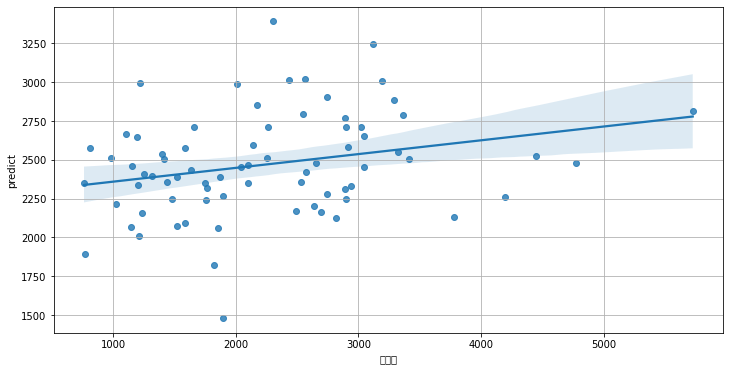

In [968]:
y_test['predict'] = test_predict2.predict(scaled_x_test)
plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='충전량', y='predict', data=y_test)
plt.grid()
plt.show()

In [857]:
x = test[['압축도', '근처인구수', '교통량']]
y = test[['충전량']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=12)

robust = RobustScaler()
scaled_x = robust.fit_transform(x_train)

poly_features = PolynomialFeatures(degree = 4, include_bias=False)
X_poly = poly_features.fit_transform(scaled_x)

lin_leg = LinearRegression()

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1678.1641306442727

In [859]:
y_test.describe()

,충전량
count,89.000000
mean,2448.557873
std,1279.191124
min,854.827500
25%,1476.397273
50%,2146.954167
75%,2940.650833
max,5806.172500


c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='주차장수', ylabel='충전량'>

c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ms964\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:15

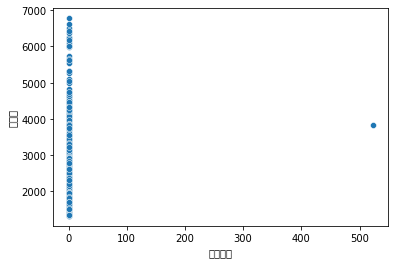

In [ ]:
sns.scatterplot(test['주차장수'], test['충전량'])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(scaled_x, y_train)

np.sqrt(mean_squared_error(y_test, tree_reg.predict(scaled_x_test)))

1337.2033674048396